**Data Dictionary**

<font color='blue'><b>id: UserId <br>
<font color='blue'><b>r : Recency <br>
<font color='blue'><b>F : Overall Frequency <br>
<font color='blue'><b>m : Overall Monetary <br>
<font color='blue'><b>tof : Time on File (in days) <br>
<font color='blue'><b>F* variables are count, e.g., Fclassic3 is the number of classics books the customer has bought in the past <br>
<font color='blue'><b>M* variables are monetary, e.g., Mclassic3 is the amount spent on classics in the past <br>

**Importing basic libraries**

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Read data**

In [100]:
df = pd.read_excel('Amazon.xlsx')

### 1. Getting familiar with the data

**Peak the data frame**

In [5]:
df.head()

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,914,NaN,194,7,318.894775,1703,1,0,1,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,NaN,3,14,368.052246,2364,1,0,2,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


**Data frame info**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33713 entries, 0 to 33712
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                33713 non-null  int64  
 1   logtarg           8311 non-null   float64
 2   r                 33713 non-null  int64  
 3   f                 33713 non-null  int64  
 4   m                 33713 non-null  float64
 5   tof               33713 non-null  int64  
 6   Ffiction1         33713 non-null  int64  
 7   Fclassics3        33713 non-null  int64  
 8   Fcartoons5        33713 non-null  int64  
 9   Flegends6         33713 non-null  int64  
 10  Fphilosophy7      33713 non-null  int64  
 11  Freligion8        33713 non-null  int64  
 12  Fpsychology9      33713 non-null  int64  
 13  Flinguistics10    33713 non-null  int64  
 14  Fart12            33713 non-null  int64  
 15  Fmusic14          33713 non-null  int64  
 16  Ffacsimile17      33713 non-null  int64 

**Basic stats descriptive statistics (mean, median, min, max, standard deviation) for each field**

In [7]:
df.describe()

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
count,3.371300e+04,8311.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,...,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000
mean,8.234209e+06,0.130050,508.427254,5.820603,251.924325,1296.088186,0.590900,0.228102,0.356480,0.104767,...,29.095301,4.223431,21.147507,0.305226,0.020681,6.785558,3.728635,8.402428,6.020431,1.800973
std,4.426015e+06,0.659962,542.440039,7.008049,3929.929826,818.976321,1.762201,0.865510,1.105653,0.527764,...,2087.221131,19.975164,2898.452008,1.991675,0.501499,21.197488,15.007592,46.021881,19.643978,21.383867
min,9.140000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.391616e+06,0.000000,117.000000,1.000000,39.899994,536.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.967691e+06,0.000000,293.000000,3.000000,102.629944,1311.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.199823e+07,0.000000,712.000000,7.000000,247.297485,2132.000000,1.000000,0.000000,0.000000,0.000000,...,18.899994,0.000000,2.500000,0.000000,0.000000,5.112919,0.000000,0.000000,0.000000,0.000000
max,1.625264e+07,6.082878,2460.000000,118.000000,532892.000000,2462.000000,109.000000,29.000000,49.000000,22.000000,...,383154.500000,820.563477,532182.000000,78.724670,21.448685,771.610840,735.354980,1999.150391,794.137695,2412.960938


**Check for missing values**

<AxesSubplot:>

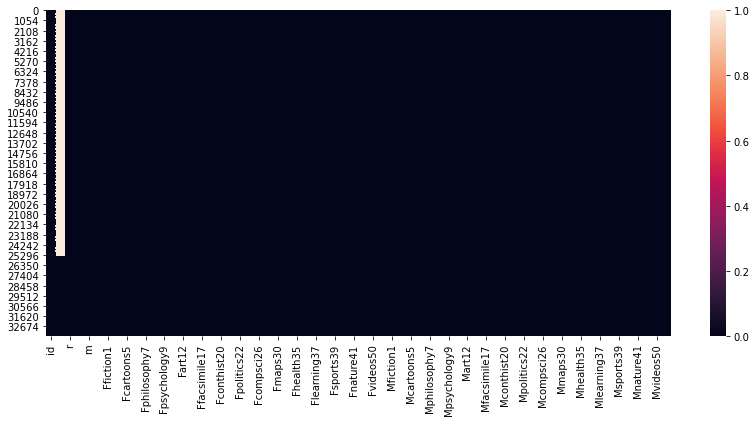

In [9]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull())

<font color='red'><b> What is your initial take on the dataset and it's completeness?

### 2. Exploratory Data Analysis

**Let's take a look at the distribution of Recency**

Text(0.5, 0, 'Recency')

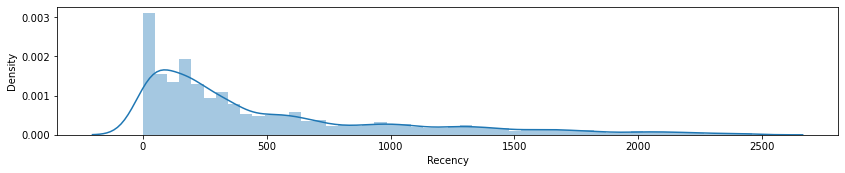

In [13]:
plt.figure(figsize=(14,8))
plt.subplot(3, 1, 1); sns.distplot(df['r'])
plt.xlabel('Recency')

**Let's take a look at the distribution of Frequency**

Text(0.5, 0, 'Frequency')

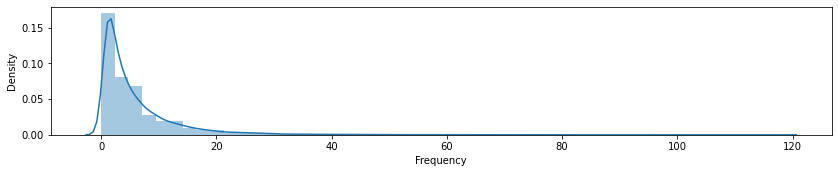

In [15]:
plt.figure(figsize=(14,8))
plt.subplot(3, 1, 1); sns.distplot(df['f'])
plt.xlabel('Frequency')

**Let's take a look at the distribution of Monetary**

Text(0.5, 0, 'Monetary')

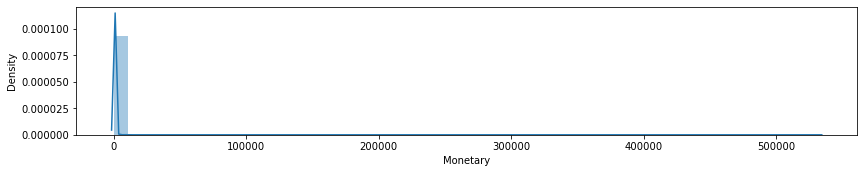

In [16]:
plt.figure(figsize=(14,8))
plt.subplot(3, 1, 1); sns.distplot(df['m'])
plt.xlabel('Monetary')

**Let's take a look at the distribution of Time on File**

Text(0.5, 0, 'Time on File (in days)')

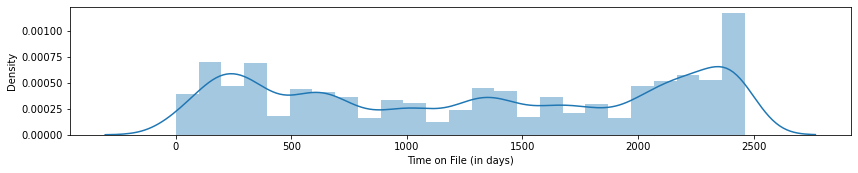

In [17]:
plt.figure(figsize=(14,8))
plt.subplot(3, 1, 1); sns.distplot(df['tof'])
plt.xlabel('Time on File (in days)')

<font color='red'><b>What are your takeaways from looking at the distributions of Recency, Frequency, Monetary and Time of File? What initial recommendations can be make to the stakeholder based on these? 

<font color='red'><b>What other EDA's can you think of doing? Try 1 or 2 below.

### 3. RFM Analysis

**Let's see if we can use Recency, Frequency and Monetary to come up segments and identify similar users**

In [27]:
rfm_df = df[['id', 'r', 'f', 'm']]

In [28]:
rfm_df.head()

,id,r,f,m
0,914,194,7,318.894775
1,957,3,14,368.052246
2,1406,1489,15,423.298340
3,1414,155,4,71.217041
4,1546,194,6,442.638184


**We create 4 labels for our f_labels, where 4 is the “best” quantile. We do the same for our f_label. We then create new columns “R” and “F” and assign the r_group and f_group values to them respectively**

In [30]:
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(rfm_df['r'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(rfm_df['f'], q=4, labels=f_labels)
# Create new columns R and F 
rfm_df = rfm_df.assign(R = r_groups.values, F = f_groups.values)
rfm_df.head()

,id,r,f,m,R,F
0,914,194,7,318.894775,3,3
1,957,3,14,368.052246,4,4
2,1406,1489,15,423.298340,1,4
3,1414,155,4,71.217041,3,3
4,1546,194,6,442.638184,3,3


**We do the same for our monetary value by grouping the values into 4 quantiles using .qcut() method**

In [31]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(rfm_df['m'], q=4, labels=m_labels)
# Create new column M
rfm_df = rfm_df.assign(M = m_groups.values)

**Finally, with these 3 scores in place, R, F, and M, we can create our first RFM segment by concatenating the values together below**

In [34]:
def join_rfm(x): 
    return str(x['R']) + str(x['F']) + str(x['M'])

In [35]:
rfm_df['RFM_Segment_Concat'] = rfm_df.apply(join_rfm, axis=1)
rfm_df.head()

,id,r,f,m,R,F,M,RFM_Segment_Concat
0,914,194,7,318.894775,3,3,4,334
1,957,3,14,368.052246,4,4,4,444
2,1406,1489,15,423.298340,1,4,4,144
3,1414,155,4,71.217041,3,3,2,332
4,1546,194,6,442.638184,3,3,4,334


**Summing the Score is one of the most straightforward methods is to sum our scores to a single number and define RFM levels for each score range**

In [37]:
rfm_df['RFM_Score'] = rfm_df[['R','F','M']].sum(axis=1)
rfm_df[['id','RFM_Score']].head()

,id,RFM_Score
0,914,10
1,957,12
2,1406,9
3,1414,8
4,1546,10


**Let's check out the RFM Scores**

<AxesSubplot:xlabel='RFM_Score', ylabel='count'>

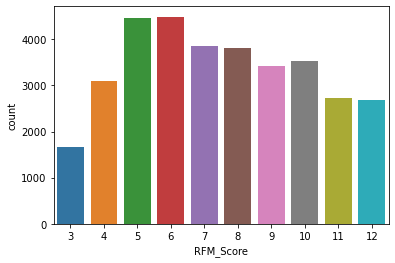

In [38]:
sns.countplot(rfm_df['RFM_Score'])

**Let's get creative and hypothesize about what each score range entails and break down the users into different RFM Groups**

In [39]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [41]:
rfm_df['RFM_Level'] = rfm_df.apply(rfm_level, axis=1)
rfm_df.head()

,id,r,f,m,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
0,914,194,7,318.894775,3,3,4,334,10,Can't Loose Them
1,957,3,14,368.052246,4,4,4,444,12,Can't Loose Them
2,1406,1489,15,423.298340,1,4,4,144,9,Can't Loose Them
3,1414,155,4,71.217041,3,3,2,332,8,Champions
4,1546,194,6,442.638184,3,3,4,334,10,Can't Loose Them


**Calculate average values for each RFM_Level, and return a size of each segment**

In [45]:
rfm_level_agg = rfm_df.groupby('RFM_Level').agg({
    'r': 'mean',
    'f': 'mean',
    'm': ['mean', 'count']
}).round(1)
print(rfm_level_agg)

                         r     f      m       
                      mean  mean   mean  count
RFM_Level                                     
Can't Loose Them     217.2  11.6  552.1  12359
Champions            431.0   4.5  164.9   3804
Loyal                577.6   3.5  112.4   3857
Needs Attention      862.4   1.2   30.5   3089
Potential            535.8   2.1   63.8   4483
Promising            694.9   1.6   44.2   4462
Require Activation  1460.3   1.0   19.0   1659


<font color='red'><b>What conclusions can you derive about each of the group and how can these be valuable to your business case? Explain briefly

<font color='red'><b>In the above analysis, we have chosen the following groups: <br>
<font color='red'><b>-Can't Loose Them <br>
<font color='red'><b>-Champions <br>
<font color='red'><b>-Loyal <br>
<font color='red'><b>-Needs Attention <br>
<font color='red'><b>-Potential <br>
<font color='red'><b>-Promising <br>
<font color='red'><b>-Require Activation <br>
<font color='red'><b> Can you come with your own groups using the RFM Score? Groups can be more or less than above

<font color='red'><b>Explain the reasoning behind each group and how it can be valuable to your business case

### 3. KMeans Clustering

**Let's look at KMeans clustering techniques to find out similar users based on the items they purchase and respective monetary value**

K-Means clustering intends to partition n objects into k clusters in which each object belongs to the cluster with the nearest mean. This method produces exactly k different clusters of greatest possible distinction. The best number of clusters k leading to the greatest separation (distance) is not known as a priori and must be computed from the data. To find the optimal number of clusters k, we will use the elbow method.

**Data Frame of all items**

In [95]:
items_df = df.iloc[:,6:36]
items_df.index = df['id']

In [96]:
items_df.head()

,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,Fpsychology9,Flinguistics10,Fart12,Fmusic14,...,Fhealth35,Fcooking36,Flearning37,FGamesRiddles38,Fsports39,Fhobby40,Fnature41,Fencyclopaedia44,Fvideos50,Fnonbooks99
id,,,,,,,,,,,,,,,,,,,,,
914,1,0,1,0,0,0,0,0,1,7,...,2,1,0,0,0,0,0,0,0,0
957,1,0,2,0,0,0,0,0,0,4,...,7,0,4,0,0,4,2,1,0,0
1406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1546,0,0,1,0,3,1,0,1,1,3,...,3,0,2,0,0,2,0,0,3,0


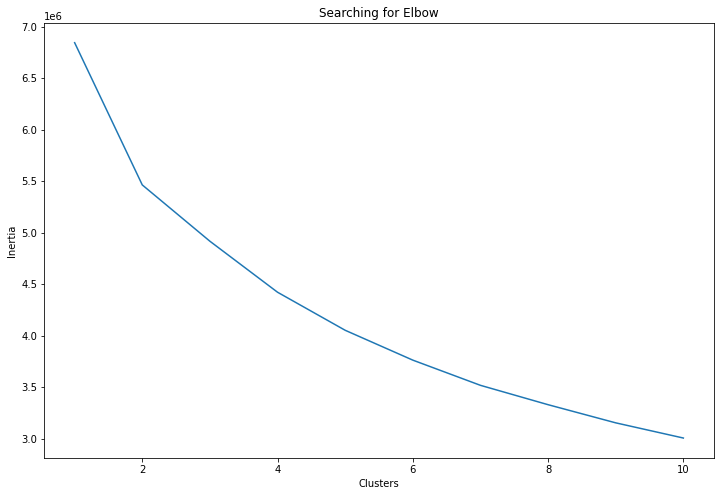

In [86]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(items_df)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

**Elbow method tells us to select the cluster when there is a significant change in inertia. Anywhere between 4 to 6 seem reasonable. For my analysis, I will go with 4**

**Let's apply KMeans and see the results**

In [87]:
km5 = KMeans(n_clusters=4).fit(items_df)

items_df['Labels'] = km5.labels_

**For visualization purposes in 2D, let's pick Ffiction1 and Freligion8**

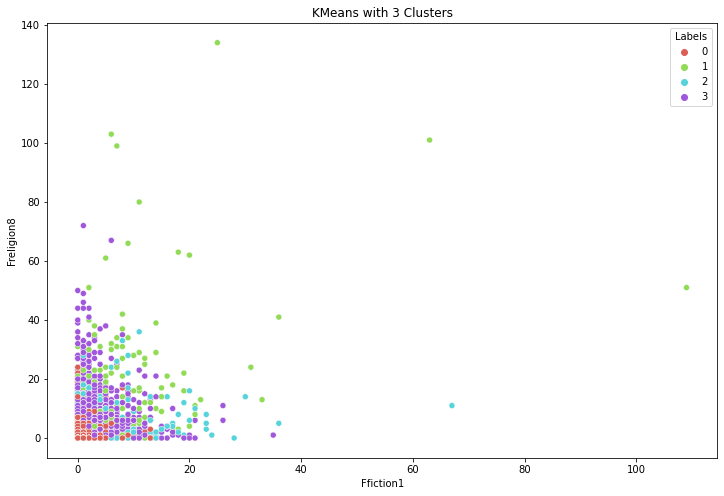

In [90]:
plt.figure(figsize=(12, 8))
sns.scatterplot(items_df['Ffiction1'], items_df['Freligion8'], hue=items_df['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 3 Clusters')
plt.show()

<font color='red'><b>What conclusions can you draw from the above clustering technique? Can you change the number of clusters and find better results? Try below.

<font color='red'><b>Can you try another clustering technique below and see if you can get better results?

### 4. Item Based Collaboratibe Filtering

**We'll use Nearest Neigbors to calculate the distance between users using the cosine similarity and find the nearest neighbors for each user. I have set nearest neighbors to 3 in order to find 2 other nearest users except the user iteself**

In [97]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(items_df.values)
distances, indices = knn.kneighbors(items_df.values, n_neighbors=3)

**Let's look at the indices of nearest neighbors of each user**

In [98]:
indices

array([[    0, 19081,  7640],
       [    1,  4490, 11118],
       [    2, 17529,  9739],
       ...,
       [33710,  2243,  7616],
       [    0,     1,     2],
       [  118,   411,   805]])

**Each row corresponds to the row in the items_df. The first element in a row is the most similar (nearest) user. Generally, it is the user itself. The second element is the second nearest, and the third is the third nearest. For example, in the first row [0,19081,7640], the nearest user to user_0 is itself, the second nearest user is user_19081, and the third is user_7640**

<font color='red'><b>Compare RFM, Clustering and Item Based Collaborative Filtering on basis of the distinct business value each generates

<font color='red'><b>What will you do when all 3 methods discussed above don't produce relevant results? How will you still recommend items to a user?

<font color='red'><b>What are some other recommendation techniques? Explain any 2 (no code needed)

<font color='red'><b>What other data set can you use for this project?